# Import Libraries

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import stemgraphic


# Import Data

In [115]:
df = pd.read_csv("near_Earth_Data.csv")
data = df[["Object","CA Distance Minimum (au)","V infinity (km/s)","Diameter(max)(m)"]]
data = data.dropna()
print(data)

           Object  CA Distance Minimum (au)  V infinity (km/s)  \
0      (2020 AY1)                   0.02116               5.60   
1       (2019 YK)                   0.03608               7.35   
2      (2020 AP3)                   0.01658               5.16   
3      (2020 AN2)                   0.01965              15.34   
4       (2020 AX)                   0.04919               7.31   
...           ...                       ...                ...   
3304   (2018 YJ2)                   0.04698              13.05   
3305   (2020 YO3)                   0.00132              16.61   
3306  (2010 UE51)                   0.02280               1.22   
3307   (2020 YR2)                   0.02577               8.02   
3308   (2021 AM6)                   0.03862               6.64   

     Diameter(max)(m)  
0                54 m  
1                94 m  
2                28 m  
3                30 m  
4                33 m  
...               ...  
3304            260 m  
3305           

In [116]:
#split m form data["Diameter(max)(m)"] to float64
data["Diameter(max)(m)"] = data["Diameter(max)(m)"].str.split("m").str.get(0)
data["Diameter(max)(m)"] = data["Diameter(max)(m)"].astype(float)
print(data)
data.dropna()
data.dtypes

           Object  CA Distance Minimum (au)  V infinity (km/s)  \
0      (2020 AY1)                   0.02116               5.60   
1       (2019 YK)                   0.03608               7.35   
2      (2020 AP3)                   0.01658               5.16   
3      (2020 AN2)                   0.01965              15.34   
4       (2020 AX)                   0.04919               7.31   
...           ...                       ...                ...   
3304   (2018 YJ2)                   0.04698              13.05   
3305   (2020 YO3)                   0.00132              16.61   
3306  (2010 UE51)                   0.02280               1.22   
3307   (2020 YR2)                   0.02577               8.02   
3308   (2021 AM6)                   0.03862               6.64   

      Diameter(max)(m)  
0                 54.0  
1                 94.0  
2                 28.0  
3                 30.0  
4                 33.0  
...                ...  
3304             260.0  
3305   

Object                       object
CA Distance Minimum (au)    float64
V infinity (km/s)           float64
Diameter(max)(m)            float64
dtype: object

## หา max,min,mean, median, mode, sample Standard deviation ของข้อมูลแต่ละคอลัมน์


sai = "simple analysis info"

In [117]:
sai = data.describe()
print(sai)

       CA Distance Minimum (au)  V infinity (km/s)  Diameter(max)(m)
count               3283.000000        3283.000000       3283.000000
mean                   0.021017          10.304892         53.792842
std                    0.014158           5.066821         89.261581
min                    0.000035           0.580000          1.500000
25%                    0.008475           6.830000         21.000000
50%                    0.019450           9.300000         34.000000
75%                    0.032550          12.890000         55.000000
max                    0.049990          40.190000       1400.000000


In [118]:
data.mode()

,Object,CA Distance Minimum (au),V infinity (km/s),Diameter(max)(m)
0,(2019 VL5),0.00474,8.0,16.0
1,(2020 CX1),NaN,NaN,27.0
2,(2020 PN1),NaN,NaN,NaN
3,(2020 PP1),NaN,NaN,NaN
4,(2021 GN1),NaN,NaN,NaN
5,(2021 KO2),NaN,NaN,NaN


In [168]:
def remove_outliers(df, column):
    print(column)
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    iqr = q3 - q1
    print(q1, q3, iqr)
    lower_outliers = df[column][df[column] < q1 - 1.5*iqr]
    upper_outliers = df[column][df[column] > q3 + 1.5*iqr]
    print(q1 - 1.5*iqr)
    print(q3 + 1.5*iqr)
    
    new_lst = []
    index_upper_outliers = upper_outliers.index
    for i in index_upper_outliers:
        new_lst.append(df[column][i])
    print(new_lst)
        
    t = df.drop(lower_outliers.index)
    # print(len(upper_outliers))
    
    t2 = t.drop(upper_outliers.index)
    
    return t2

In [170]:
cleaningData = remove_outliers(data, "CA Distance Minimum (au)")
cleaningData = remove_outliers(cleaningData, "V infinity (km/s)")
cleanedData = remove_outliers(cleaningData, "Diameter(max)(m)")
len(cleanedData)

CA Distance Minimum (au)
0.008475 0.03255 0.024075000000000003
-0.027637500000000006
0.06866250000000002
[]
V infinity (km/s)
6.83 12.89 6.0600000000000005
-2.26
21.98
[22.16, 24.78, 27.51, 28.89, 24.25, 29.29, 22.44, 25.28, 22.36, 40.19, 22.32, 32.08, 38.68, 24.01, 26.3, 26.93, 22.84, 23.03, 33.38, 24.73, 29.21, 23.66, 28.65, 25.51, 24.69, 36.55, 24.75, 37.68, 28.01, 23.37, 22.25, 23.54, 27.1, 23.27, 26.7, 31.58, 22.87, 24.05, 26.49, 24.74, 27.4, 26.07, 25.44, 26.53, 22.98, 23.64, 22.44, 23.61, 30.37, 24.45, 35.93, 23.2, 22.14, 25.7, 27.39, 24.47, 25.2, 25.03, 26.73, 24.53, 25.93, 22.98, 22.23, 26.07, 29.88, 23.94, 22.21, 23.82, 22.66, 24.35, 24.33, 25.25, 22.55, 23.04, 22.32, 24.63, 24.94, 32.58, 23.7, 23.75, 22.51, 22.02, 23.93, 24.2, 22.5, 27.66, 24.2, 23.96, 22.77, 23.65, 27.61, 24.85, 22.87, 25.1, 28.84, 24.64, 22.87, 29.95, 25.68]
Diameter(max)(m)
21.0 54.0 33.0
-28.5
103.5
[130.0, 110.0, 580.0, 190.0, 110.0, 470.0, 200.0, 190.0, 110.0, 230.0, 130.0, 140.0, 210.0, 960.0, 140.0, 

2959

In [142]:
cleanedData.dropna()
cleanedData.describe()
print(len(cleanedData))

2959


Histrogram

<AxesSubplot:xlabel='CA Distance Minimum (au)', ylabel='Count'>

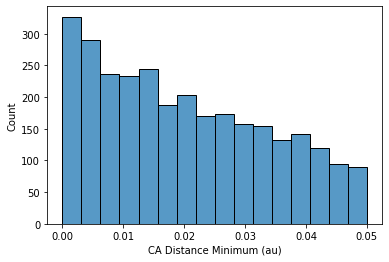

In [122]:
sns.histplot(cleanedData["CA Distance Minimum (au)"])

<AxesSubplot:xlabel='V infinity (km/s)', ylabel='Count'>

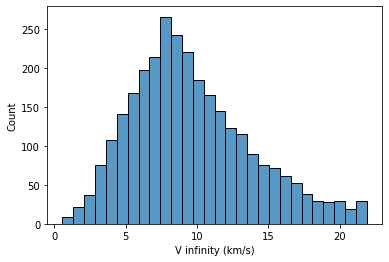

In [123]:
sns.histplot(cleanedData["V infinity (km/s)"])

<AxesSubplot:xlabel='Diameter(max)(m)', ylabel='Count'>

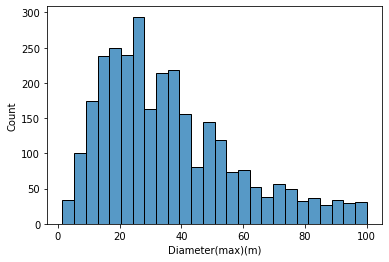

In [124]:
sns.histplot(cleanedData["Diameter(max)(m)"])

Stem and Leave

(<Figure size 540x972 with 1 Axes>, <Axes:>)

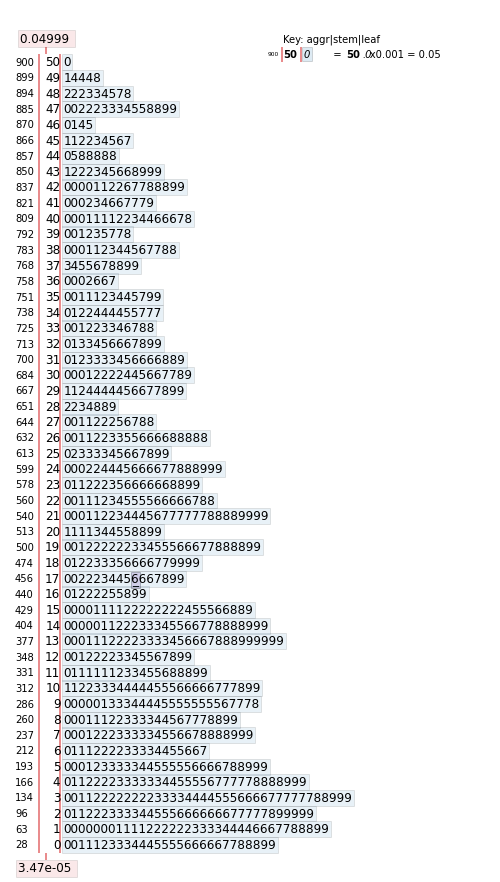

In [125]:
stemgraphic.stem_graphic(cleanedData["CA Distance Minimum (au)"])

(<Figure size 540x846 with 1 Axes>, <Axes:>)

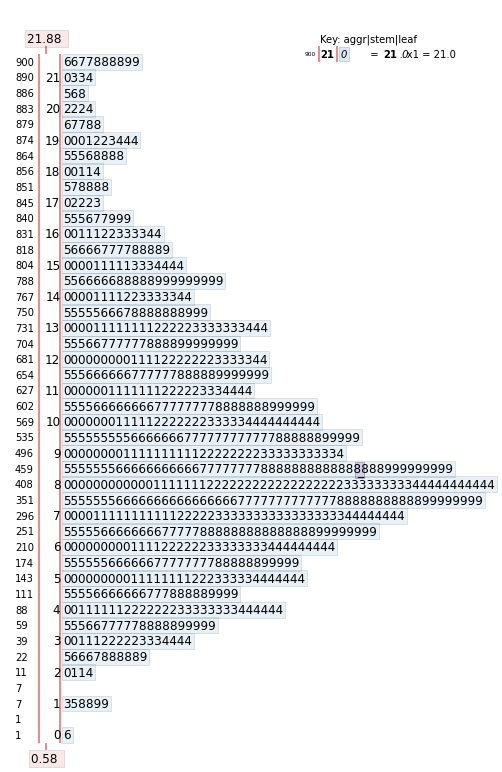

In [126]:
stemgraphic.stem_graphic(cleanedData["V infinity (km/s)"])

(<Figure size 540x432 with 1 Axes>, <Axes:>)

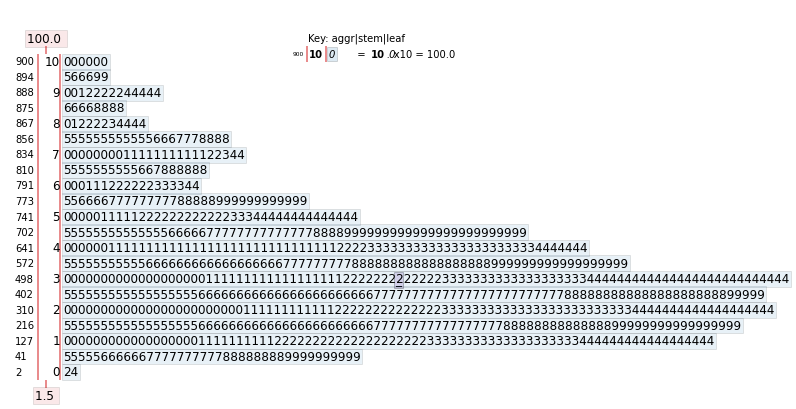

In [127]:
stemgraphic.stem_graphic(cleanedData["Diameter(max)(m)"])

Box plot

<AxesSubplot:xlabel='CA Distance Minimum (au)'>

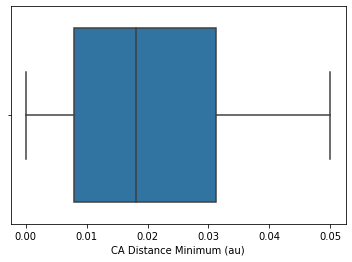

In [128]:
sns.boxplot(x=cleanedData["CA Distance Minimum (au)"])

<AxesSubplot:xlabel='V infinity (km/s)'>

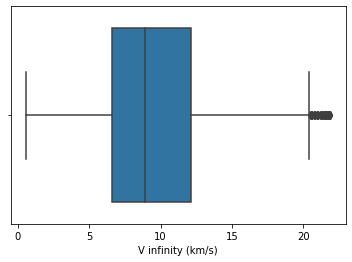

In [129]:
sns.boxplot(x=cleanedData["V infinity (km/s)"])

<AxesSubplot:xlabel='Diameter(max)(m)'>

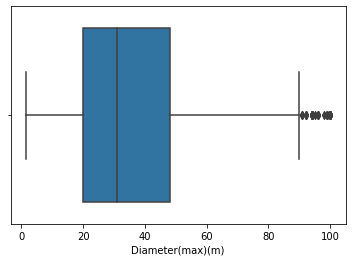

In [130]:
sns.boxplot(x=cleanedData["Diameter(max)(m)"])

XY (Scatter) Plot

<AxesSubplot:xlabel='CA Distance Minimum (au)', ylabel='V infinity (km/s)'>

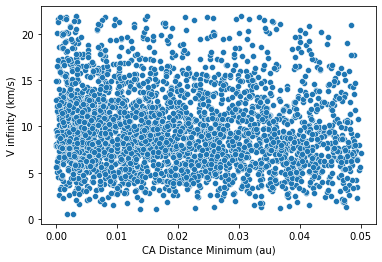

In [131]:
sns.scatterplot(x=cleanedData["CA Distance Minimum (au)"],y=data["V infinity (km/s)"])

<AxesSubplot:xlabel='Diameter(max)(m)', ylabel='V infinity (km/s)'>

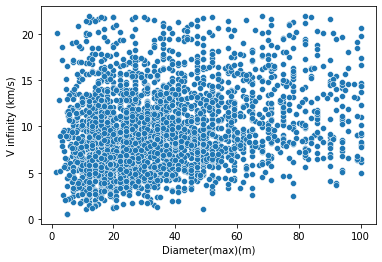

In [171]:
sns.scatterplot(x=cleanedData["Diameter(max)(m)"],y=data["V infinity (km/s)"])

Probability Density Function

<AxesSubplot:xlabel='CA Distance Minimum (au)', ylabel='Probability'>

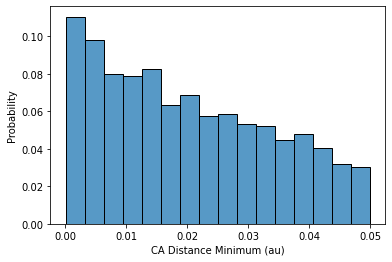

In [132]:
sns.histplot(cleanedData["CA Distance Minimum (au)"], stat="probability")

<AxesSubplot:xlabel='V infinity (km/s)', ylabel='Probability'>

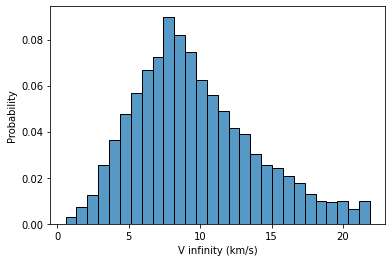

In [133]:
sns.histplot(cleanedData["V infinity (km/s)"], stat="probability")

<AxesSubplot:xlabel='Diameter(max)(m)', ylabel='Probability'>

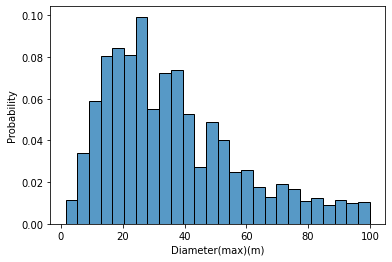

In [134]:
sns.histplot(cleanedData["Diameter(max)(m)"], stat="probability")

Cumulative Probability Function

<AxesSubplot:xlabel='CA Distance Minimum (au)', ylabel='Probability'>

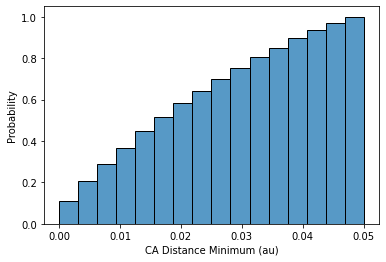

In [135]:
sns.histplot(cleanedData["CA Distance Minimum (au)"], cumulative=True, stat="probability")

<AxesSubplot:xlabel='V infinity (km/s)', ylabel='Probability'>

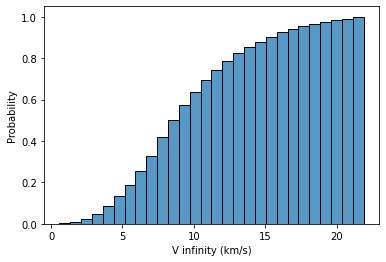

In [136]:
sns.histplot(cleanedData["V infinity (km/s)"], cumulative=True, stat="probability")

<AxesSubplot:xlabel='Diameter(max)(m)', ylabel='Probability'>

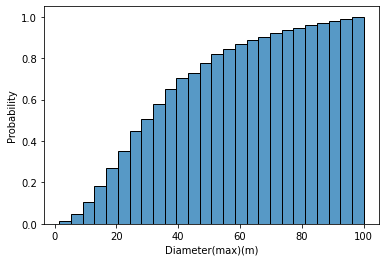

In [137]:
sns.histplot(cleanedData["Diameter(max)(m)"], cumulative=True, stat="probability")